In [193]:
!pip install tensorflow
!pip install scikeras

In [194]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [195]:
import pandas as pd
import seaborn as sb
import plotly.express as px
import pickle as pk
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

In [196]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Intro to AI/CustomerChurn_dataset.csv")

# Data Preprocessing

In [197]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Dropping the customerID column as it will not be needed in training our model

In [199]:
data.drop('customerID', axis = 1, inplace= True)

Converting 'TotalCharges' to a float type

In [200]:
data['TotalCharges']= pd.to_numeric(data['TotalCharges'], errors = 'coerce')

## Handling missing values in TotalCharges

Filling all missing values with the mean of the Values in the TotalCharges column

In [201]:
# Calculate the mean of the column
mean_value = data['TotalCharges'].mean()

# Fill missing values with the mean
data['TotalCharges'] = data['TotalCharges'].fillna(mean_value)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [203]:
for column in data.columns:
  if data[column].dtype ==object:
    print(column, data[column].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


For some columns, no internet service means that option is still a no. Hence, i am changing these options to a No

In [204]:
data.replace('No phone service', 'No', inplace = True)
data.replace('No internet service', 'No', inplace = True)

## Data Visualization

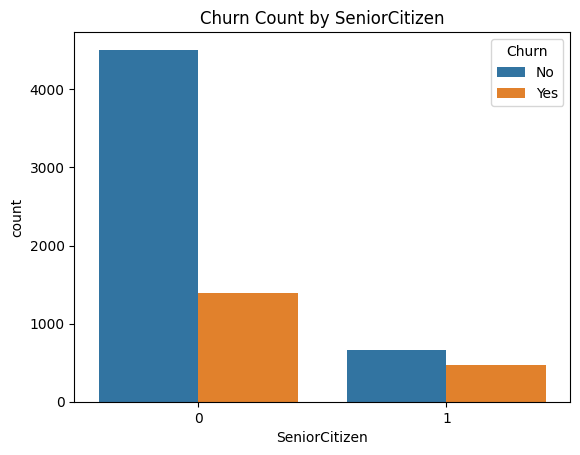

In [205]:
# Bar Chart for Senior Citizen
sb.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn Count by SeniorCitizen')
plt.show()


This graph suggests that non-senior citizens churn less and also that the company has more customers who are non-senior citizens

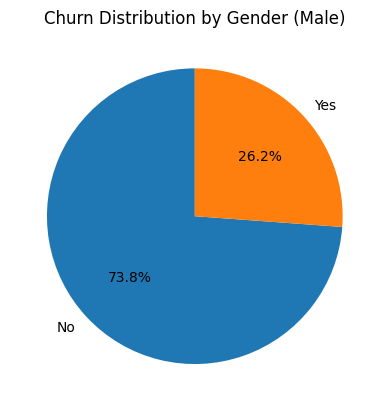

In [206]:
# Pie Chart for Gender
groupa = data[data['gender'] == 'Male']['Churn'].value_counts()
plt.pie(groupa, labels=groupa.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution by Gender (Male)')
plt.show()



The pie chart illustrates that a higher percentage of males do not churn

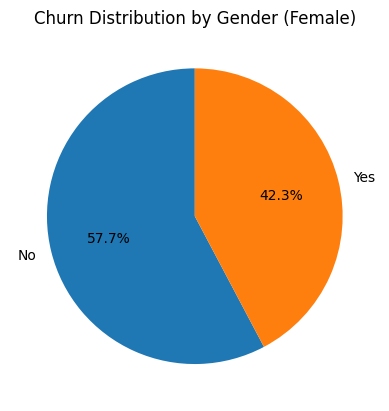

In [207]:
# Pie Chart for Gender
groupa = data[(data['gender'] == 'Female') & (data['SeniorCitizen']== 1)]['Churn'].value_counts()
plt.pie(groupa, labels=groupa.index, autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution by Gender (Female)')
plt.show()

More females churn than males. However, comparing the two pie charts, larger ratio of women churn. Hence gender is a good determinor for if a customer churns or not

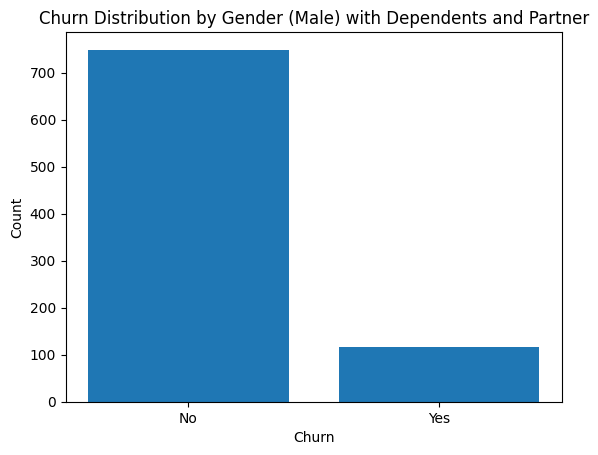

In [208]:
# Bar Chart for Gender with Dependents and Partner
groupa = data[(data['gender'] == 'Male') & (data['Dependents'] == 'Yes') & (data['Partner'] == 'Yes')]['Churn'].value_counts()
plt.bar(groupa.index, groupa.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender (Male) with Dependents and Partner')
plt.show()



This graph suggests that the male with dependents and a prtner have a lower churn rate

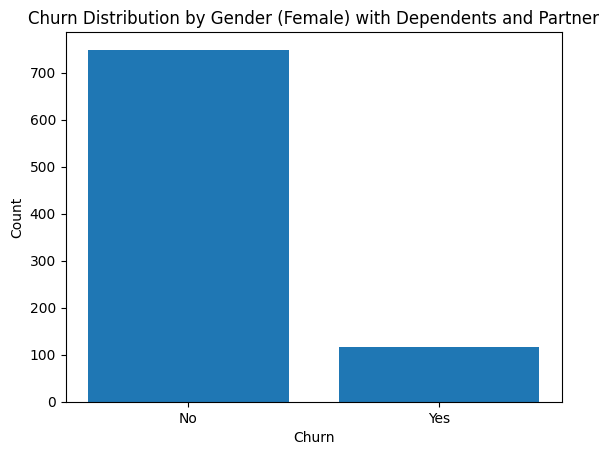

In [209]:
# Bar Chart for Gender with Dependents and Partner
groupb = data[(data['gender'] == 'Female') & (data['Dependents'] == 'No') & (data['Partner'] == 'No')]['Churn'].value_counts()
plt.bar(groupa.index, groupa.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender (Female) with Dependents and Partner')
plt.show()


This illustrates that females with no dependents and partner have a lower churn rate

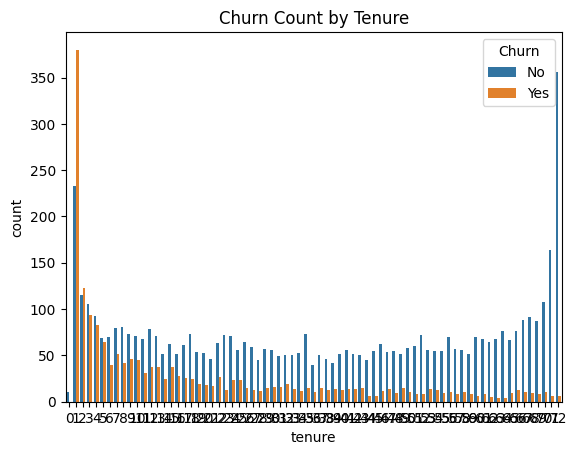

In [210]:
sb.countplot(x='tenure', hue='Churn', data=data)
plt.title('Churn Count by Tenure')
plt.show()


The customers with higher tenure churn lesser than those with a lower tenure

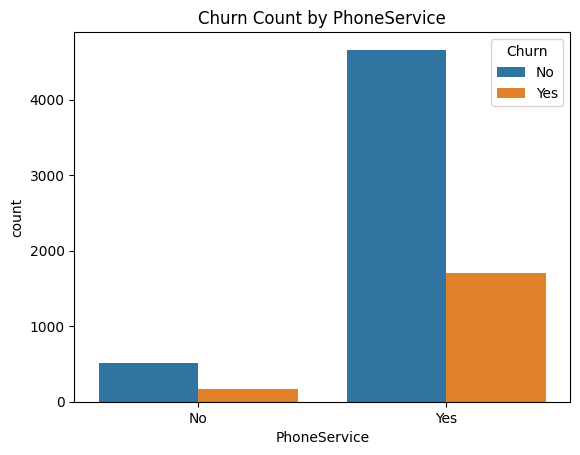

In [211]:
sb.countplot(x='PhoneService', hue='Churn', data=data)
plt.title('Churn Count by PhoneService')
plt.show()


A higher number of customers with phone service churn

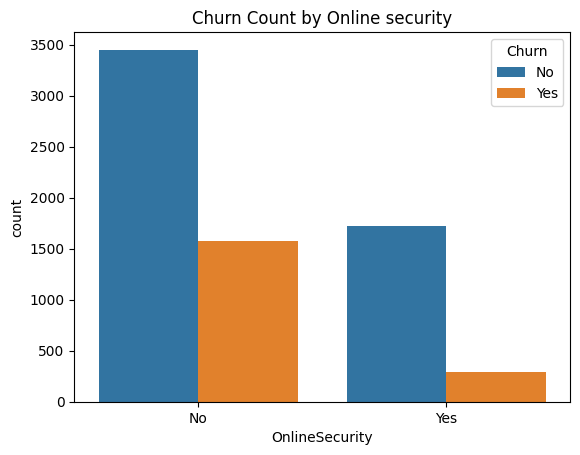

In [212]:
sb.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title('Churn Count by Online security')
plt.show()


Customers without online security churn more

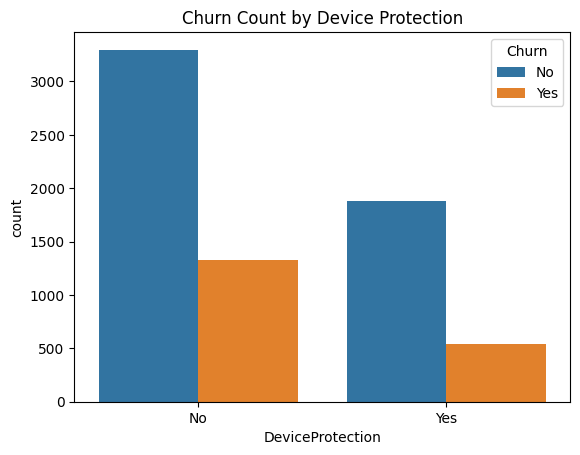

In [213]:
sb.countplot(x='DeviceProtection', hue='Churn', data=data)
plt.title('Churn Count by Device Protection')
plt.show()


Customers without device protection churn more

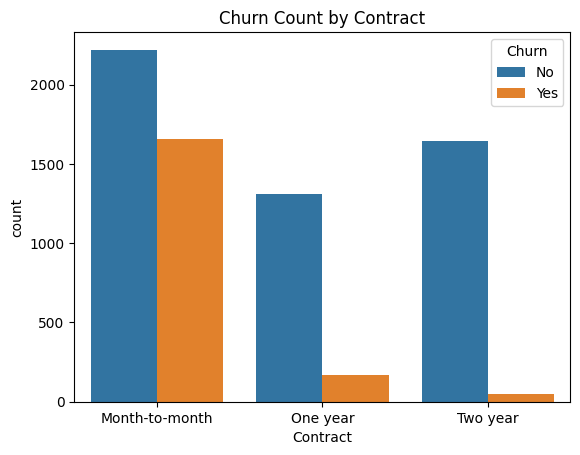

In [214]:
sb.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Count by Contract')
plt.show()


Customers with month-to-month contracts churn more

One hot encoding Features of type object

In [150]:
target = data['Churn']
data.drop(['Churn'], axis = 1, inplace= True)

In [151]:
le = LabelEncoder()
target= pd.Series(le.fit_transform(target))

In [152]:
label_encoder = LabelEncoder()
columns_to_encode =[]
one_hot_columns = []

In [153]:
for column in data.columns:
  if data[column].dtype == object:
    if data[column].nunique()==2:
      columns_to_encode.append(column)
    else:
      one_hot_columns.append(column)

In [154]:
for column in columns_to_encode:
    data[column] = le.fit_transform(data[column])

In [155]:
df_encoded= pd.get_dummies(data, one_hot_columns)

In [156]:
data.drop(one_hot_columns, axis =1, inplace = True)

In [157]:
data = pd.concat([df_encoded], axis=1)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [159]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,...,0.343746,0.439585,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,...,0.474991,0.496372,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 # Scaling the features

In [160]:
columns_to_scale =['MonthlyCharges', 'TotalCharges', 'tenure']

In [161]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(data[columns_to_scale])
data2 = pd.DataFrame(scaled_features, columns = data[columns_to_scale].columns)

In [162]:
data.drop(columns_to_scale, axis=1, inplace= True)

In [163]:
data = pd.concat([data, data2], axis=1)

In [164]:
features = data

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [166]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [167]:
# Create a tree-based model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(X_train, y_train)

# selected features
selected_features = X_train.columns[rfecv.support_]

In [168]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
selected_features = features.columns[support_mask]
print(selected_features)

Index(['gender', 'SeniorCitizen', 'Partner', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'PaperlessBilling',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'MonthlyCharges',
       'TotalCharges', 'tenure'],
      dtype='object')


In [169]:
selected_columns = ['gender', 'SeniorCitizen', 'Partner', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'PaperlessBilling',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'MonthlyCharges',
       'TotalCharges', 'tenure']

data = data[selected_columns]

Splitting the data into test, train and validation sets

In [170]:
features = data

In [171]:
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.2, random_state=42)

In [172]:
X_validate, X_test, y_validate, y_test = train_test_split(X_temp, y_temp, test_size=0.1, random_state=42)

#Training ANN model

In [173]:
# required libraries for training ANN
import keras
from keras.models import Model
from keras.layers import Input, Dense,Dropout
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [176]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(11, activation='relu')(input_layer)
dropout_1 = Dropout(0.3)(hidden_layer_1)  # Adding Dropout
hidden_layer_2 = Dense(6, activation='relu')(dropout_1)
dropout_2 = Dropout(0.3)(hidden_layer_2)  # Adding Dropout
hidden_layer_3 = Dense(2, activation='relu')(dropout_2)

output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model_1 = Model(inputs=input_layer, outputs=output_layer)

model_1.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

history=model_1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_validate, y_validate))

Epoch 1/100
177/177 [==============================] - 2s 5ms/step - loss: 0.5845 - accuracy: 0.7336 - val_loss: 0.5018 - val_accuracy: 0.7342
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5217 - accuracy: 0.7345 - val_loss: 0.4597 - val_accuracy: 0.7342
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4946 - accuracy: 0.7345 - val_loss: 0.4459 - val_accuracy: 0.7342
Epoch 4/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4936 - accuracy: 0.7345 - val_loss: 0.4463 - val_accuracy: 0.7342
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7345 - val_loss: 0.4407 - val_accuracy: 0.7342
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4883 - accuracy: 0.7345 - val_loss: 0.4374 - val_accuracy: 0.7342
Epoch 7/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7345 - val_loss: 0.4353 - val_accuracy: 0.7342

##Model Evaluation

In [177]:
train_loss, train_accuracy = model_1.evaluate(X_train, y_train)
print(f'Training loss:{train_loss*100:.4f}, Training Accuracy:{train_accuracy*100:.4f}')

val_loss , val_accuracy = model_1.evaluate(X_validate,y_validate)
print(f'Validation loss:{val_loss*100:.4f}, Validation Accuracy:{val_accuracy*100:.4f}')
loss, taccuracy = model_1.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {taccuracy*100:.4f}')

177/177 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8085
Training loss:41.5697, Training Accuracy:80.8484
40/40 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8107
Validation loss:40.6531, Validation Accuracy:81.0726
5/5 [==============================] - 0s 3ms/step - loss: 0.4199 - accuracy: 0.8156
Test Loss: 0.4199
Test Accuracy: 81.5603


##Graphical representation of evaluation

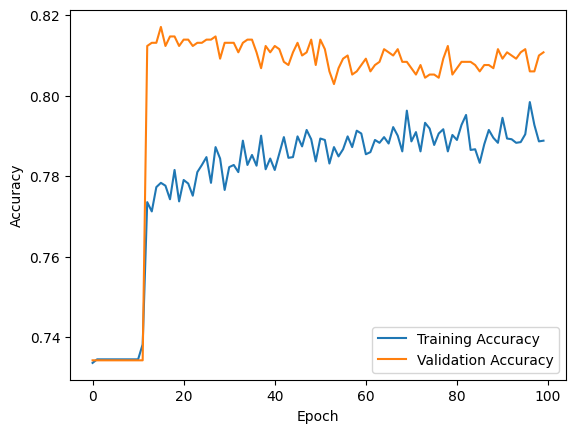

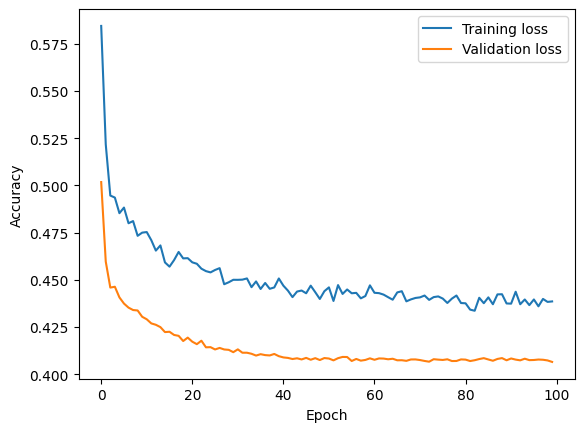

In [178]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Training loss')
plt.plot(history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Hyperparameter Tuning

The model is tuned using gridsearch

Using gridsearch to find the best parameters for the model

In [ ]:
# param_grid = {
#     'optimizer': ['adam', 'sgd', 'rmsprop'],
#     'dropout_rate': [0.2, 0.3,0.4],

#     'weight_constraint': [3.0, 5.0],
# }
# # Function to create a model
# def create_model(optimizer='adam',dropout_rate=0.2,weight_constraint=3.0):
#     input_layer = Input(shape=(X_train.shape[1],))
#     hidden_layer_1 = Dense(11, activation='relu')(input_layer)
#     dropout_1 = Dropout(0.2)(hidden_layer_1)  # Adding Dropout
#     hidden_layer_2 = Dense(6, activation='relu')(dropout_1)
#     dropout_2 = Dropout(0.2)(hidden_layer_2)  # Adding Dropout
#     hidden_layer_3 = Dense(2, activation='relu')(dropout_2)

#     output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

#     model = Model(inputs=input_layer, outputs=output_layer)

#     model.compile(optimizer= optimizer, loss='binary_crossentropy', metrics=['accuracy'])
#     return model

# keras_classifier = KerasClassifier(build_fn=create_model,batch_size=32, verbose=0,dropout_rate=0.3, weight_constraint = 3.0)

# grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
# grid_result = grid.fit(X_train, y_train)

# best_params = grid_result.best_params_
# best_accuracy = grid_result.best_score_

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)

In [179]:
from keras.layers import Dropout

# Define the parameter grid with different values for hyperparameters
param_grid = {
    'optimizer': ['adam'],
    'dropout_rate': [0.2, 0.3],
    'weight_constraint': [3.0, 5.0],
    'epochs': [100, 150],
    'num_layers': [3, 4],
}

# Function to create a model
def create_model(optimizer='adam', dropout_rate=0.2, num_layers=3):
    input_layer = Input(shape=(X_train.shape[1],))
    x = input_layer

    for _ in range(num_layers):
        x = Dense(11, activation='relu')(x)
        x = Dropout(dropout_rate)(x)

    output_layer = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

keras_classifier = KerasClassifier(build_fn=create_model, batch_size=32,dropout_rate= 0.2, num_layers=3,
                                  )

grid = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
best_accuracy = grid_result.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6431 - accuracy: 0.6734
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5504 - accuracy: 0.7355
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5150 - accuracy: 0.7348
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7380
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7455
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7522
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7483
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4828 - accuracy: 0.7561
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 0.7522
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.7583
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 2s 4ms/step - loss: 0.6629 - accuracy: 0.6266
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5697 - accuracy: 0.7341
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5140 - accuracy: 0.7441
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7622
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4735 - accuracy: 0.7675
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7625
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4774 - accuracy: 0.7646
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7707
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4662 - accuracy: 0.7714
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4609 - accuracy: 0.7735
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6304 - accuracy: 0.6972
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5745 - accuracy: 0.7341
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7348
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7341
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5083 - accuracy: 0.7345
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5012 - accuracy: 0.7341
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7345
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7345
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7345
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7345
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6034 - accuracy: 0.7199
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7341
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5302 - accuracy: 0.7345
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5159 - accuracy: 0.7345
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7345
Epoch 6/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4982 - accuracy: 0.7345
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7345
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4860 - accuracy: 0.7345
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7348
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4793 - accuracy: 0.7394
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6133 - accuracy: 0.7238
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7334
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5208 - accuracy: 0.7366
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7330
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5040 - accuracy: 0.7387
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7377
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.7448
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7437
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7433
Epoch 10/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7405
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6759 - accuracy: 0.5864
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5815 - accuracy: 0.7284
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5363 - accuracy: 0.7355
Epoch 4/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5177 - accuracy: 0.7462
Epoch 5/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7540
Epoch 6/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4952 - accuracy: 0.7526
Epoch 7/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4918 - accuracy: 0.7533
Epoch 8/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4717 - accuracy: 0.7547
Epoch 9/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7611
Epoch 10/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4769 - accuracy: 0.7614
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6742 - accuracy: 0.6479
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5826 - accuracy: 0.7320
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5329 - accuracy: 0.7341
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7409
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7469
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4983 - accuracy: 0.7508
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7590
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7515
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4929 - accuracy: 0.7515
Epoch 10/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4845 - accuracy: 0.7593
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6490 - accuracy: 0.6688
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5624 - accuracy: 0.7309
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5247 - accuracy: 0.7380
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5027 - accuracy: 0.7448
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7540
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4783 - accuracy: 0.7575
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4757 - accuracy: 0.7558
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4720 - accuracy: 0.7650
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4691 - accuracy: 0.7664
Epoch 10/150
89/89 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7646
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6622 - accuracy: 0.6358
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5640 - accuracy: 0.7299
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5469 - accuracy: 0.7309
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5306 - accuracy: 0.7384
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7398
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5280 - accuracy: 0.7355
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7441
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.7497
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7494
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7458
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.6518
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5858 - accuracy: 0.7270
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5483 - accuracy: 0.7320
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7291
Epoch 5/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5155 - accuracy: 0.7412
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7483
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.7504
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7554
Epoch 9/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7540
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7572
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 4s 2ms/step - loss: 0.6196 - accuracy: 0.6812
Epoch 2/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.7291
Epoch 3/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7306
Epoch 4/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7320
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5245 - accuracy: 0.7327
Epoch 6/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.7341
Epoch 7/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5050 - accuracy: 0.7338
Epoch 8/100
89/89 [==============================] - 0s 2ms/step - loss: 0.5044 - accuracy: 0.7341
Epoch 9/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7338
Epoch 10/100
89/89 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.7338
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.5970 - accuracy: 0.7323
Epoch 2/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5557 - accuracy: 0.7334
Epoch 3/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5293 - accuracy: 0.7334
Epoch 4/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7345
Epoch 5/100
89/89 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7341
Epoch 6/100
89/89 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.7345
Epoch 7/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7341
Epoch 8/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.7359
Epoch 9/100
89/89 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.7412
Epoch 10/100
89/89 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.7423
Epoch 11/100
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5843
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.6285 - accuracy: 0.7320
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7338
Epoch 4/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5671 - accuracy: 0.7341
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5383 - accuracy: 0.7504
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7490
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7508
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4951 - accuracy: 0.7593
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7465
Epoch 10/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7629
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.7270
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5550 - accuracy: 0.7334
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7401
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.7472
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7522
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4816 - accuracy: 0.7561
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4824 - accuracy: 0.7625
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7480
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.7707
Epoch 10/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.7739
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 3ms/step - loss: 0.6255 - accuracy: 0.7015
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5680 - accuracy: 0.7338
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7341
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5269 - accuracy: 0.7387
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5165 - accuracy: 0.7483
Epoch 6/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.7398
Epoch 7/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4941 - accuracy: 0.7462
Epoch 8/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4855 - accuracy: 0.7465
Epoch 9/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4931 - accuracy: 0.7504
Epoch 10/150
89/89 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7448
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


89/89 [==============================] - 1s 2ms/step - loss: 0.6257 - accuracy: 0.7302
Epoch 2/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5653 - accuracy: 0.7341
Epoch 3/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5464 - accuracy: 0.7341
Epoch 4/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5412 - accuracy: 0.7341
Epoch 5/150
89/89 [==============================] - 0s 2ms/step - loss: 0.5420 - accuracy: 0.7338
Epoch 6/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.7345
Epoch 7/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7341
Epoch 8/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.7345
Epoch 9/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7341
Epoch 10/150
89/89 [==============================] - 0s 3ms/step - loss: 0.5035 - accuracy: 0.7345
Epoch 11/150
89/89 [=

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


177/177 [==============================] - 2s 3ms/step - loss: 0.6281 - accuracy: 0.6803
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5525 - accuracy: 0.7336
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5208 - accuracy: 0.7350
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5064 - accuracy: 0.7457
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.5014 - accuracy: 0.7540
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4884 - accuracy: 0.7504
Epoch 7/100
177/177 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7584
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4861 - accuracy: 0.7623
Epoch 9/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4809 - accuracy: 0.7657
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4721 - accuracy: 0.7616
E

###Creating and Training the model with the best parameters gotten from the gridsearch

In [180]:
epoch = best_params['epochs']
params =best_params.pop('epochs')

In [181]:
best_model = create_model(**best_params)
best_history = best_model.fit(X_train, y_train, epochs= epoch, validation_data=(X_validate, y_validate),batch_size=32)

best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test)


Epoch 1/100
177/177 [==============================] - 2s 5ms/step - loss: 0.6196 - accuracy: 0.6949 - val_loss: 0.5399 - val_accuracy: 0.7342
Epoch 2/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5418 - accuracy: 0.7332 - val_loss: 0.4812 - val_accuracy: 0.7342
Epoch 3/100
177/177 [==============================] - 1s 4ms/step - loss: 0.5171 - accuracy: 0.7345 - val_loss: 0.4600 - val_accuracy: 0.7342
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4920 - accuracy: 0.7345 - val_loss: 0.4441 - val_accuracy: 0.7342
Epoch 5/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4917 - accuracy: 0.7345 - val_loss: 0.4453 - val_accuracy: 0.7342
Epoch 6/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4851 - accuracy: 0.7345 - val_loss: 0.4366 - val_accuracy: 0.7342
Epoch 7/100
177/177 [==============================] - 1s 4ms/step - loss: 0.4808 - accuracy: 0.7345 - val_loss: 0.4347 - val_accuracy: 0.7342

The test loss and test accuracy of the best model is obviously better than our initial model

In [182]:
best_train_loss, best_train_accuracy = best_model.evaluate(X_train, y_train)
print(f'Training loss:{best_train_loss*100:.4f}, Training Accuracy:{best_train_accuracy*100:.4f}')

best_val_loss , best_val_accuracy = best_model.evaluate(X_validate,y_validate)
print(f'Validation loss:{val_loss*100:.4f}, Validation Accuracy:{val_accuracy*100:.4f}')

best_loss, best_taccuracy = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {best_loss:.4f}')
print(f'Test Accuracy: {best_taccuracy*100:.4f}')

177/177 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8064
Training loss:43.9717, Training Accuracy:80.6354
40/40 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8162
Validation loss:40.6531, Validation Accuracy:81.0726
5/5 [==============================] - 0s 3ms/step - loss: 0.4516 - accuracy: 0.8085
Test Loss: 0.4516
Test Accuracy: 80.8511


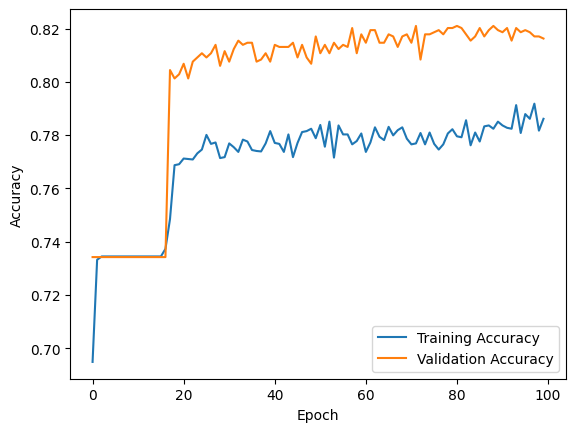

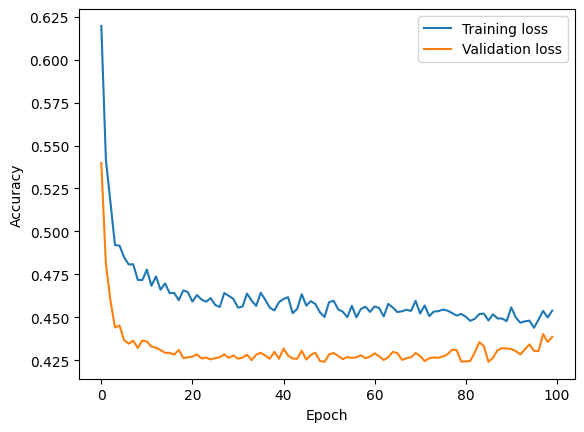

In [183]:
plt.plot(best_history.history['accuracy'],label='Training Accuracy')
plt.plot(best_history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(best_history.history['loss'],label='Training loss')
plt.plot(best_history.history['val_loss'],label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [185]:
if best_test_accuracy< taccuracy:
  best_model= model_1

# Model's Accuracy and AUC score

AUC is a metric used to assess a model's ability to distinguish from postive and negative classes

The predictions made by the model are between 0 and 1 due to the use of the sigmoid activation function. A line of code converts these values to 0s and 1s

In [186]:
# Predict the labels for the test set
y_pred = best_model.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.8156028368794326
AUC Score: 0.8271164021164021


The accuracy suggests that about 81.56% of the instances were correctly classified
The AUC suggests that the model has a good distinguishing power

## Confusion matrix on the best model

In [187]:
cm = confusion_matrix(y_pred_binary, y_test)

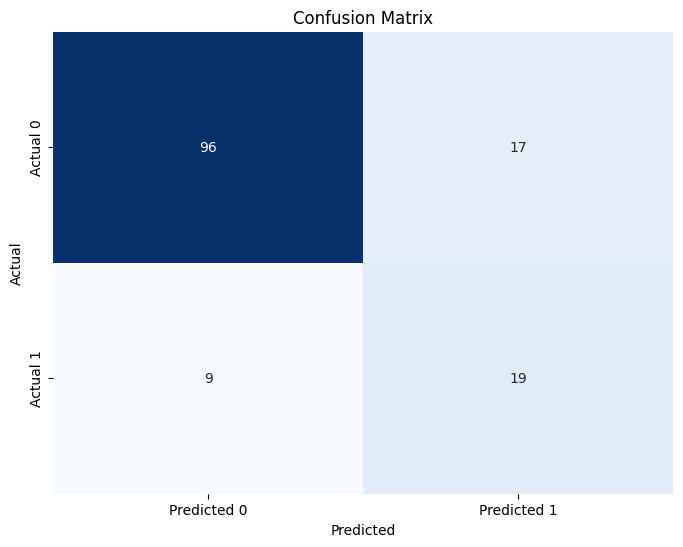

In [188]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Saving the model and scaler

In [189]:
import pickle as pk

In [190]:
with open('/content/drive/My Drive/Colab Notebooks/Intro to AI/mlp_model.pkl', "wb") as model_file:
  pk.dump(best_model, model_file)

In [191]:
with open('/content/drive/My Drive/Colab Notebooks/Intro to AI/mlp_scaler.pkl', "wb") as scaler_file:
  pk.dump(scaler, scaler_file)

In [192]:
features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'PaperlessBilling',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check', 'MonthlyCharges',
       'TotalCharges', 'tenure'],
      dtype='object')